# Predicting Obesity: Machine Learning Meets Public Health
by Betsy Fridman and Andrew Arbitman

Obesity, which causes physical and mental problems, is a global health problem with serious consequences. The prevalence of obesity is increasing steadily, and therefore, new research is needed that examines the influencing factors of obesity and how to predict the occurrence of the condition according to these factors.

Obesity is bad for health because it significantly increases the risk of several serious conditions:


- Heart Disease: Excess fat strains the heart, raising the risk of heart attacks and strokes due to high blood pressure and cholesterol.


- Type 2 Diabetes: Obesity causes insulin resistance, leading to high blood sugar and diabetes.


- Cancer: Obesity is linked to several cancers, including breast, colon, and liver cancers.


- Sleep Apnea: Obesity increases the risk of sleep apnea, leading to disrupted breathing during sleep.


- Mental Health Issues: It can cause depression, anxiety, and lower self-esteem due to social stigma and body image concerns.


- Joint Problems: Extra weight stresses the joints, especially the knees and back, increasing the risk of osteoarthritis.


- Fatty Liver Disease: Obesity can lead to fat buildup in the liver, causing liver damage.

The rising prevalence of obesity places a substantial burden on healthcare systems worldwide. The associated medical conditions (heart disease, diabetes, etc.) require long-term care and treatment, contributing to higher healthcare costs. As governments and healthcare providers struggle to cope with the financial demands of treating obesity-related diseases, addressing obesity through prevention and early intervention becomes critical.

Obesity is linked to reduced productivity, increased absenteeism, and higher disability rates, all of which can negatively impact the economy. Studies have shown that obesity-related productivity losses cost billions of dollars annually. This connection makes it essential for businesses, governments, and communities to implement policies and programs aimed at reducing obesity rates.

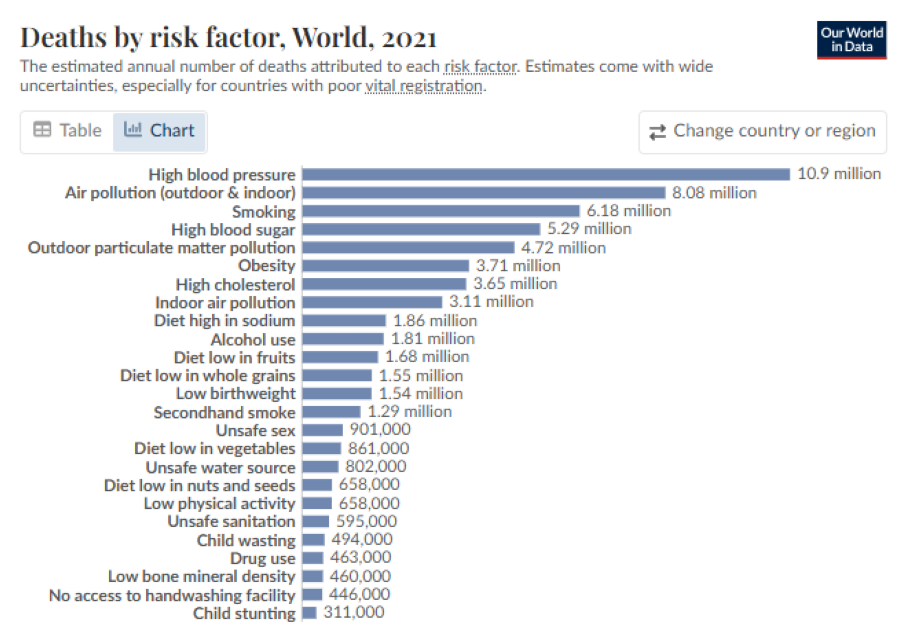

In [493]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(14, 8))
img = mpimg.imread('/Users/aarbitman/Downloads/image.png')
plt.imshow(img)
plt.axis("off")
plt.show()

https://ourworldindata.org/obesity

# Possible Contributors to Obesity

1. Age and Obesity:

Obesity rates tend to increase with age due to factors like slower metabolism, decreased physical activity, and changes in hormones.


In adults aged 40 and older, obesity is more common due to reduced energy expenditure and muscle mass.


Childhood obesity is a growing concern, with long-term health consequences, including the risk of obesity in adulthood.


2. Gender and Obesity:

Women are generally more likely to be obese than men, particularly after middle age, due to hormonal changes, especially during menopause.


Men may accumulate more visceral fat (fat around organs), while women tend to have more subcutaneous fat (fat under the skin).


Gender differences in lifestyle, such as diet and physical activity, contribute to obesity patterns.


3. Family History with Overweight:

Genetics play a significant role in obesity, with family history influencing how the body stores and processes fat.


People with a family history of obesity are at higher risk, but lifestyle factors like diet and exercise are also critical.


Environmental factors, such as a home environment where unhealthy eating is normalized, can increase the likelihood of obesity.


4. Eating Habits (FAVC - High Caloric Food):

Consuming high-calorie, processed foods frequently leads to an imbalance between calorie intake and expenditure, promoting weight gain.


High-calorie food consumption, especially those rich in sugar and fat, contributes to the development of obesity.


Portion sizes have also increased, leading to an overconsumption of calories over time.


5. Physical Activity (FAF - Frequency of Activity):

Regular physical activity helps maintain a healthy weight, while sedentary behavior contributes to obesity.


Lack of exercise leads to fewer calories burned and increases the risk of obesity-related conditions like diabetes and heart disease.


Active people typically have lower body fat percentages, while sedentary individuals tend to accumulate excess fat.


6. Water Intake (CH2O):

Drinking water helps control hunger and can reduce calorie intake by promoting satiety and reducing the need for sugary drinks.


Dehydration can be mistaken for hunger, leading to overeating.


While water itself doesn't directly reduce fat, healthy hydration is part of a balanced lifestyle that supports weight management.


7. Technology Use (TUE):

Increased screen time often leads to a sedentary lifestyle, reducing physical activity levels and contributing to weight gain.


Children and adults who spend long hours on devices may have higher rates of obesity due to decreased physical movement and poor eating habits.


Time spent on technology can be linked to late-night snacking, contributing to weight gain.


8. Transportation Choices (MTRANS):

Using cars or public transport instead of walking or biking leads to less physical activity, which increases the risk of obesity.


Areas with better access to walkable infrastructure, such as sidewalks and parks, tend to have lower obesity rates.


Choosing active transportation, like walking or biking, helps increase daily physical activity and can reduce obesity risk.


9. Smoking (SMOKE):

Smoking may initially suppress appetite, leading to lower body weight in smokers compared to non-smokers.


However, smoking has harmful effects on metabolism and cardiovascular health, which can make it more difficult for smokers to maintain a healthy weight long-term.


Quitting smoking can lead to weight gain due to the restoration of appetite and a decrease in metabolic rate, but this is generally outweighed by the health benefits of quitting.


10. Obesity Prediction:

Obesity prediction models use various features (age, gender, activity levels, etc.) to estimate the likelihood of a person being obese.


The most important predictors of obesity include dietary habits, physical activity, genetics, and environmental factors.


Accurate obesity prediction can help identify high-risk individuals and inform preventive interventions.

# Imports and Reading the Data

In [449]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/aarbitman/Downloads/ObesityDataSet_raw_and_data_sinthetic.csv')

# Data Preprocessing

In [450]:
df.head()

,Age,Gender,Height,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Dataset Information:

Gender: Feature, Categorical, "Gender" 

Age : Feature, Continuous, "Age"

Height: Feature, Continuous

family_history_with_overweight: Feature, Binary, " Has a family member suffered or suffers from overweight? "

FAVC : Feature, Binary, " Do you eat high caloric food frequently? "

FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "

NCP : Feature, Continuous, " How many main meals do you have daily? "

CAEC : Feature, Categorical, " Do you eat any food between meals? "

SMOKE : Feature, Binary, " Do you smoke? "

CH2O: Feature, Continuous, " How much water do you drink daily? "

SCC: Feature, Binary, " Do you monitor the calories you eat daily? "

FAF: Feature, Continuous, " How often do you have physical activity? "

TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC : Feature, Categorical, " How often do you drink alcohol? "

MTRANS : Feature, Categorical, " Which transportation do you usually use? "

NObeyesdad : Target, Categorical, "Obesity level"

### The info() function checks for non-null values and the datatypes of the columns. In this case, there are no missing values.

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   CALC                            2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   SCC                             2111 non-null   object 
 8   SMOKE                           2111 non-null   object 
 9   CH2O                            2111 non-null   float64
 10  family_history_with_overweight  2111 non-null   object 
 11  FAF                             2111 non-null   float64
 12  TUE                             21

### We want all of the datatypes to be numeric, so we should change all of the 'object' datatypes to either 'int' or 'float'.

In [452]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [453]:
df["CALC"] = df["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})

In [454]:
df["FAVC"] = df["FAVC"].map({"yes": 1, "no": 0})

In [455]:
df["SCC"] = df["SCC"].map({"yes": 1, "no": 0})

In [456]:
df["SMOKE"] = df["SMOKE"].map({"yes": 1, "no": 0})

In [457]:
df["family_history_with_overweight"] = df["family_history_with_overweight"].map({"yes": 1, "no": 0})

In [458]:
df["CAEC"] = df["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})

### For the MTRANS column, we used one-hot encoding to create new binary column for each unique response.

In [459]:
df = pd.get_dummies(df, columns=["MTRANS"], dtype=int)

In [460]:
df['NObeyesdad'] = df['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 0, 'Overweight_Level_I': 0, 'Overweight_Level_II': 0, 'Obesity_Type_I': 1, 'Obesity_Type_II': 1, 'Obesity_Type_III': 1})

In [461]:
df['Obesity'] = df.pop('NObeyesdad')

# Exploratory Data Analysis

In [462]:
import seaborn as sns
import matplotlib.pyplot as plt

In [463]:
print(df.describe())

               Age       Gender       Height         CALC         FAVC  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     0.505921     1.701677     0.731407     0.883941   
std       6.345968     0.500083     0.093305     0.515498     0.320371   
min      14.000000     0.000000     1.450000     0.000000     0.000000   
25%      19.947192     0.000000     1.630000     0.000000     1.000000   
50%      22.777890     1.000000     1.700499     1.000000     1.000000   
75%      26.000000     1.000000     1.768464     1.000000     1.000000   
max      61.000000     1.000000     1.980000     3.000000     1.000000   

              FCVC          NCP          SCC        SMOKE         CH2O  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      2.419043     2.685628     0.045476     0.020843     2.008011   
std       0.533927     0.778039     0.208395     0.142893     0.612953   
min       1.000000     1.000000     0

### Histograms for Age and Height

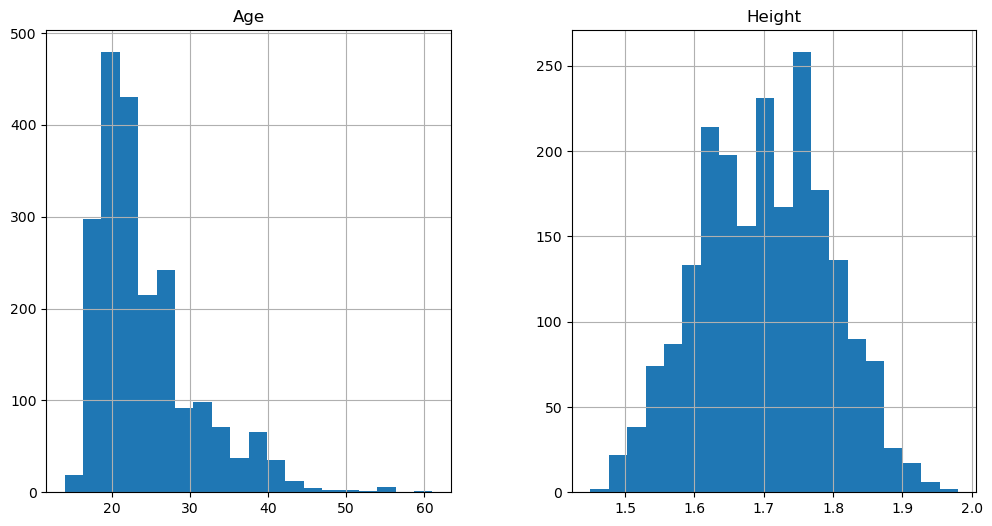

In [464]:
df.hist(["Age", "Height"], bins=20, figsize=(12, 6))
plt.show()

### Obesity Level Distribution

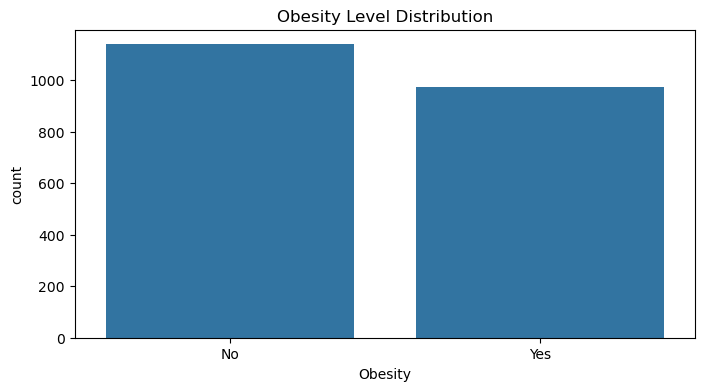

In [465]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Obesity", data=df, order=df["Obesity"].value_counts().index)
plt.xticks(ticks=range(2), labels=['No','Yes'])
plt.title("Obesity Level Distribution")
plt.show()

### Feature Correlation Heatmap

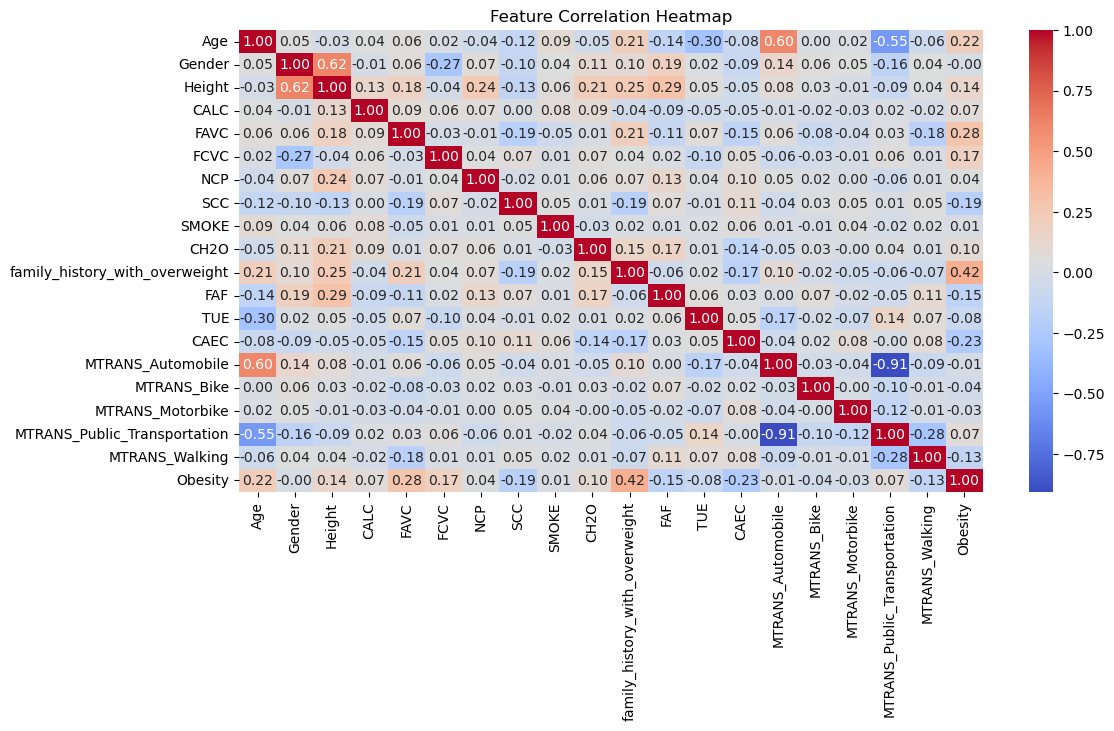

In [466]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Obesity vs Family History with Overweight

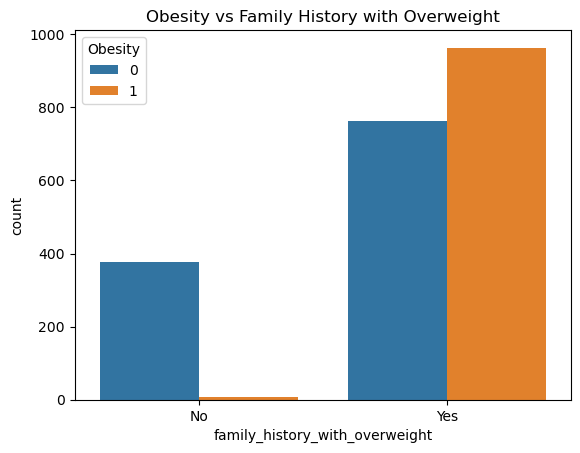

In [467]:
sns.countplot(x='family_history_with_overweight', hue='Obesity', data=df)
plt.xticks(ticks=range(2), labels=['No','Yes'])
plt.title('Obesity vs Family History with Overweight')
plt.show()

### Obesity vs High Caloric Food Frequency

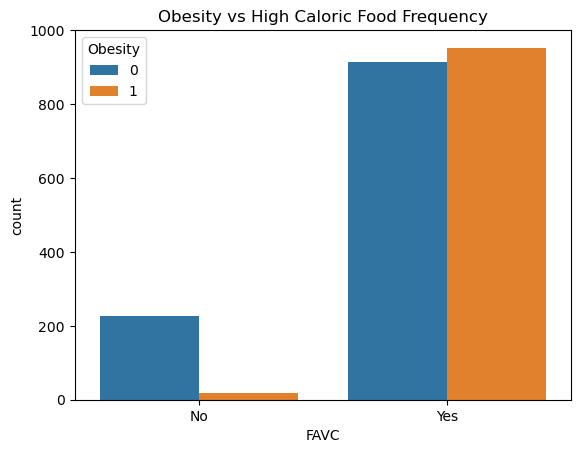

In [468]:
sns.countplot(x='FAVC', hue='Obesity', data=df)
plt.xticks(ticks=range(2), labels=['No','Yes'])
plt.title('Obesity vs High Caloric Food Frequency')
plt.show()

### Obesity vs Eating Between Meals

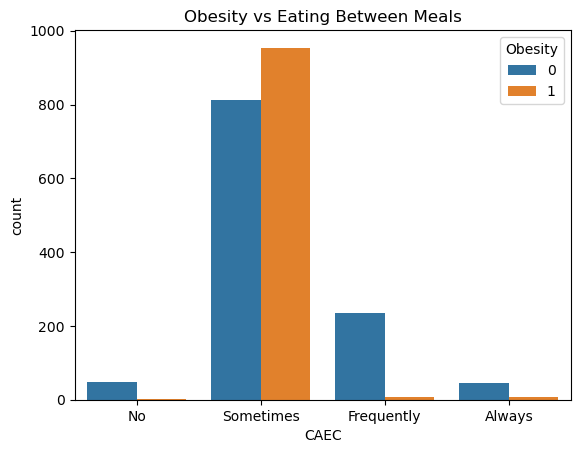

In [469]:
sns.countplot(x='CAEC', hue='Obesity', data=df)
plt.xticks(ticks=range(4), labels=['No','Sometimes', 'Frequently', 'Always'])
plt.title('Obesity vs Eating Between Meals')
plt.show()

### Obesity vs Age

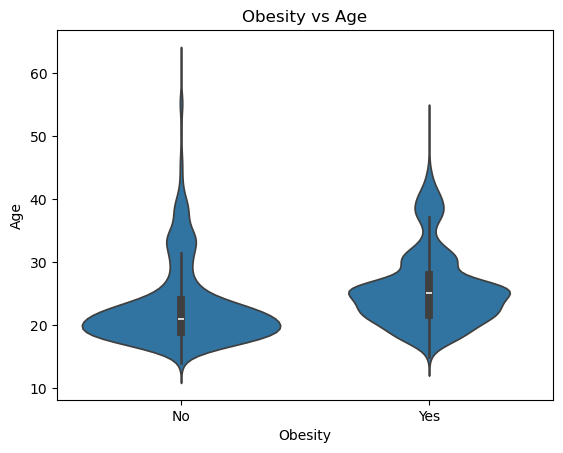

In [470]:
sns.violinplot(x='Obesity', y='Age', data=df)
plt.xticks(ticks=range(2), labels=['No','Yes'])
plt.title('Obesity vs Age')
plt.show()

### Obesity vs Gender

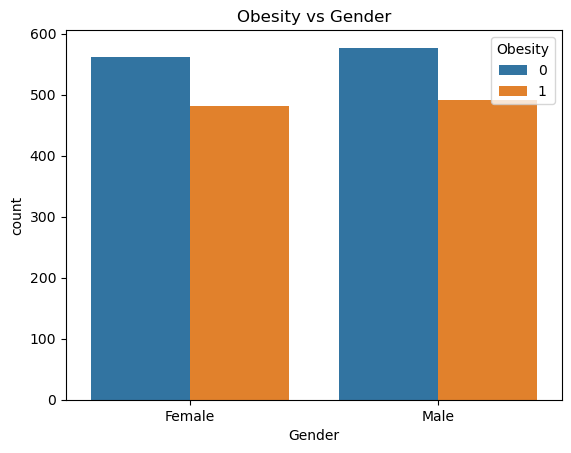

In [471]:
sns.countplot(x='Gender', hue='Obesity', data=df)
plt.xticks(ticks=range(2), labels=['Female','Male'])
plt.title('Obesity vs Gender')
plt.show()

### Alcohol Consumption vs Obesity Level

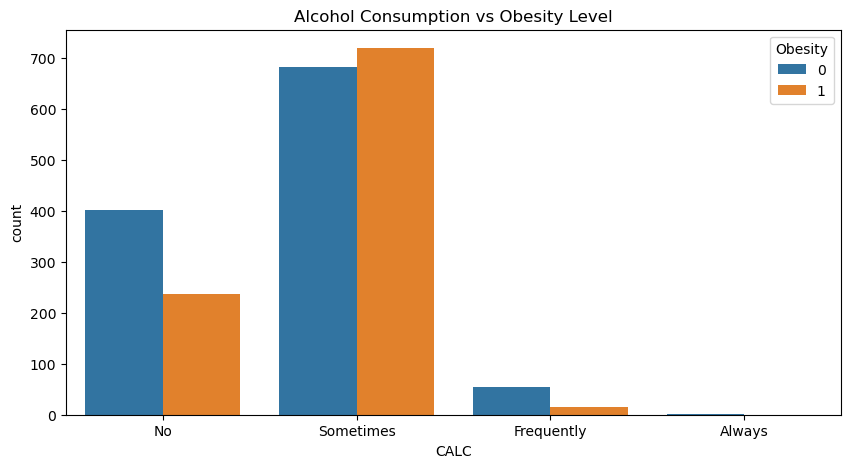

In [472]:
plt.figure(figsize=(10, 5))
sns.countplot(x="CALC", hue="Obesity", data=df)
plt.xticks(ticks=range(4), labels=['No','Sometimes', 'Frequently', 'Always'])
plt.title("Alcohol Consumption vs Obesity Level")
plt.show()

### Obesity vs Physical Activity Frequency

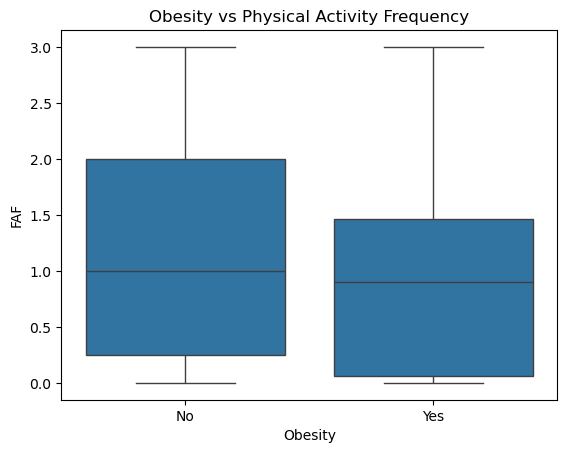

In [473]:
sns.boxplot(x='Obesity', y='FAF', data=df)
plt.xticks(ticks=range(2), labels=['No','Yes'])
plt.title('Obesity vs Physical Activity Frequency')
plt.show()

# Predictive Models

In [474]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Drop the target column for the X variable and the target column is the y variable

In [475]:
X = df.drop(columns=["Obesity"])  
y = df["Obesity"] 

### Split the data into test and training sets

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Standardize the features to have mean=0 and variance=1

In [477]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression is a statistical method used for binary classification problems. It models the probability that a given input belongs to a particular class (0 or 1) using a logistic function (sigmoid). The output is transformed using a sigmoid function to produce values between 0 and 1, representing the probability of belonging to class 1. The model is trained by minimizing a loss function (usually binary cross-entropy or log loss) using optimization methods like gradient descent. Its advantages are that it is simple, fast to train, easy to interpret, works well for linearly separable data, and provides probabilistic outputs. Some disadvantages are that it assumes a linear relationship between features and the log-odds of the outcome, and it is limited to binary classification (unless extended for multiclass), sensitive to outliers.

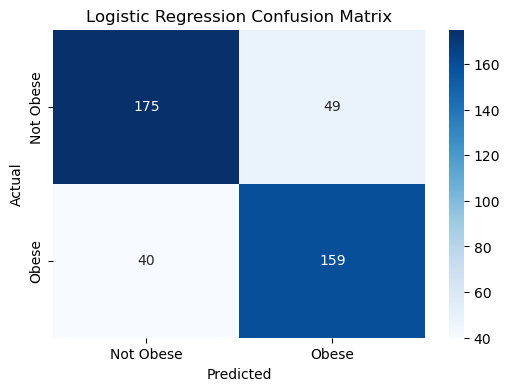

Logistic Regression Accuracy: 0.789598108747045


In [478]:
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Logistic Regression Accuracy: {accuracy_lr}")

Gradient descent is an optimization algorithm used to minimize the cost function in logistic regression. It works by iteratively adjusting the model's parameters in the direction of the steepest descent of the cost function. The magnitude of the adjustment is controlled by the learning rate. Its advantages are that it is computationally efficient, especially for large datasets, and it works well for both linear and non-linear models. Some disadvantages are that it is sensitive to the choice of learning rate, may unintentionally converge to local minima, and can be slow without proper tuning.

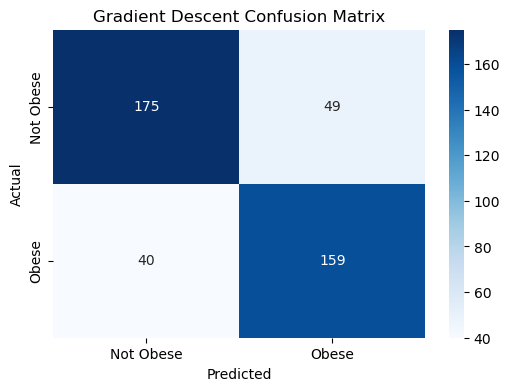

Gradient Descent Accuracy: 0.789598108747045


In [489]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add intercept term (bias) to X_train and X_test
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])  # Add bias column
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])    # Add bias column

# Initialize parameters (weights)
theta = np.zeros(X_train.shape[1])

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function (logistic loss)
def cost_function(theta, X, y):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    cost = -1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Define the gradient of the cost function
def gradient(theta, X, y):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    return 1/m * X.T.dot(predictions - y)

# Implementing Gradient Descent
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    cost_history = []
    for i in range(iterations):
        theta -= learning_rate * gradient(theta, X, y)  # Update weights
        cost_history.append(cost_function(theta, X, y))  # Store cost
    return theta, cost_history

# Run Gradient Descent
theta_optimal, cost_history = gradient_descent(X_train, y_train, theta, learning_rate=0.1, iterations=1000)

# Make predictions on the test set
y_pred = sigmoid(X_test.dot(theta_optimal)) >= 0.5  # Predicted labels (0 or 1)


cm_gradient = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gradient, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("Gradient Descent Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Descent Accuracy: {accuracy}")

A decision tree is a model that splits data into branches based on feature values to predict the target variable. It recursively divides the data into subsets using criteria like Gini Impurity or Information Gain for classification (or Mean Squared Error for regression), aiming to create pure nodes where the target variable is homogenous. The process stops when a maximum depth is reached or no further splits improve the model. The advantages are that it is easy to interpret, handles both numerical and categorical data, and can model non-linear relationships. Some disadvantages are that it is prone to overfitting, especially with deep trees, and it is sensitive to noisy data.

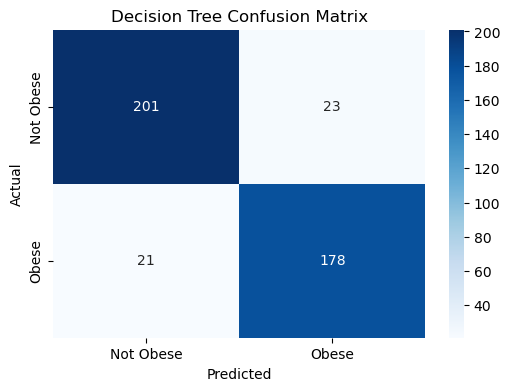

Decision Tree Accuracy: 0.8959810874704491


In [480]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Decision Tree Accuracy: {accuracy_dt}")

A random forest is an ensemble method that combines multiple decision trees to improve accuracy and robustness. Each tree in the forest is trained on a random subset of the data (bootstrapping) and splits on a random subset of features at each node. The final prediction is made by averaging the predictions of all trees (for regression) or voting on the most common class (for classification). Its advantages are that it reduces overfitting compared to a single decision tree, handles large datasets well, and can handle both classification and regression tasks. Some disadvantages are that it is more computationally expensive and less interpretable than a single decision tree.

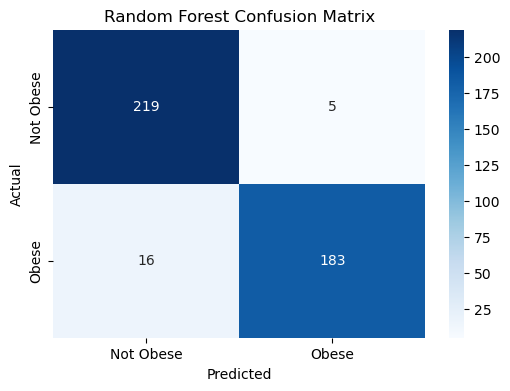

Random Forest Accuracy: 0.950354609929078


In [481]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Random Forest Accuracy: {accuracy_rf}")

Grid search is a hyperparameter tuning method used to find the best combination of hyperparameters for a model. It exhaustively tests a predefined set of hyperparameters, like the number of trees in a random forest or the maximum depth of a decision tree, by training and evaluating the model on the given dataset. The combination that results in the best performance (e.g., highest accuracy or lowest error) is selected. Its advantages are that it does thorough search for the best parameters and it can improve model performance. Some disadvantages are that it is computationally expensive, especially with a large parameter grid and datasets.

Fitting 5 folds for each of 36 candidates, totalling 180 fits


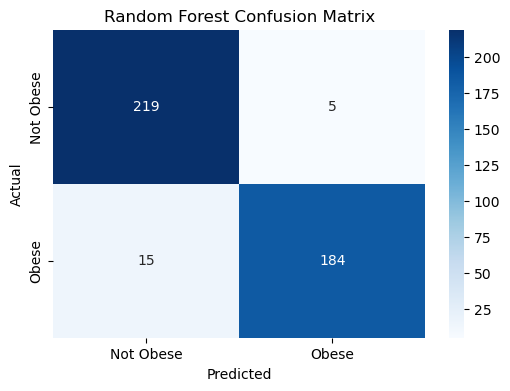

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.9527186761229315


In [482]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, # Use all CPU cores
                           verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)


# Make predictions
y_pred_rf = grid_search.predict(X_test_scaled)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate with the best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")

K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm that classifies data points based on their proximity to other data points. Given a new data point, KNN searches for the K nearest neighbors in the training dataset and assigns the class that is most frequent among them. The distance metric (usually Euclidean distance) is used to measure how far a data point is from others. Its advantages are that it is simple and intuitive, no training phase (lazy learning), works well with small datasets, and can be used for both classification and regression. Some disadvantages are that it is slow for large datasets (since it requires calculating distances to all training points), sensitive to the choice of K and the distance metric, and less effective in high-dimensional spaces (curse of dimensionality).

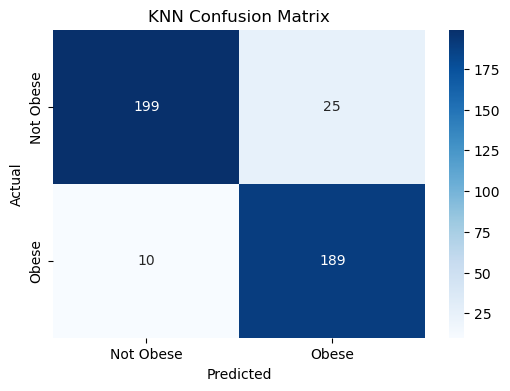

KNN Accuracy: 0.91725768321513


In [484]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"KNN Accuracy: {accuracy_knn}")

Gradient Boosting Machine (GBM) is an ensemble learning technique that builds a strong model by sequentially fitting weak models (usually decision trees) to the residuals (errors) of the previous models. Each new tree tries to correct the mistakes made by the previous one, and the process continues until the model reaches a certain number of trees or a stopping condition is met. Its advantages are that it has high predictive accuracy, works well for both regression and classification, and it can handle different types of data. Some disadvantages are that it is computationally expensive, prone to overfitting without proper tuning, and sensitive to noisy data.

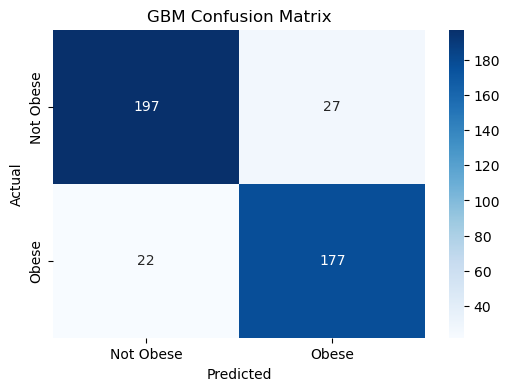

GBM Accuracy: 0.8841607565011821


In [485]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("GBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"GBM Accuracy: {accuracy_gb}")

XGBoost is a powerful gradient boosting algorithm known for its speed and performance. It builds decision trees sequentially, where each tree improves on the predictions of the previous tree. XGBoost enhances the traditional gradient boosting algorithm by using second-order derivatives for more efficient optimization and regularization techniques like L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting. It is often considered one of the best-performing algorithms for classification and regression tasks. Its advantages are that it has high performance, efficient for large datasets, and it includes regularization to reduce overfitting. Some disadvantages are that it requires careful tuning of hyperparameters, and it is computationally expensive for very large datasets.

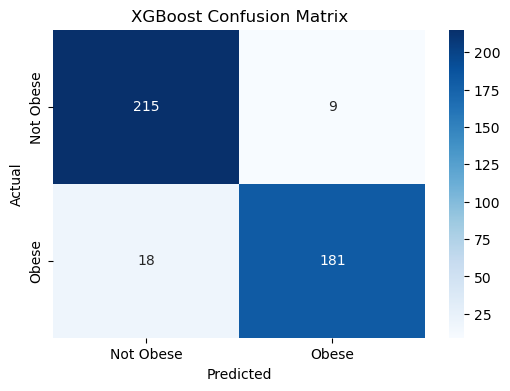

XGBoost Accuracy: 0.9361702127659575


In [486]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"XGBoost Accuracy: {accuracy_xgb}")

LightGBM is a gradient boosting algorithm that builds decision trees sequentially. It differs from traditional gradient boosting by using leaf-wise growth, which allows it to create deeper trees and improves performance. LightGBM is known for its efficiency in training speed and low memory usage, making it ideal for large datasets. It works by minimizing the loss function through the boosting process, where each tree corrects the errors of the previous one. Its advantages are that it is fast, memory-efficient, handles large datasets well, and provides high accuracy. Some disadvantages are that it can overfit if not carefully tuned, and it is harder to interpret than a single decision tree.

[LightGBM] [Info] Number of positive: 773, number of negative: 915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1817
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.457938 -> initscore=-0.168645
[LightGBM] [Info] Start training from score -0.168645


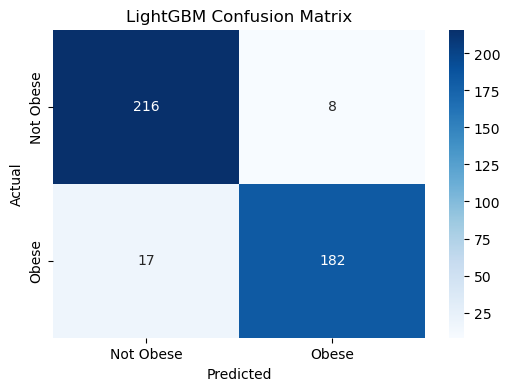

LightGBM Accuracy: 0.9408983451536643


In [487]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"LightGBM Accuracy: {accuracy_lgb}")

An MLP (Multilayer Perceptron) classifier is a type of neural network used for classification tasks. It consists of an input layer, one or more hidden layers, and an output layer. Each layer contains neurons that apply a weighted sum of the inputs, passed through an activation function (e.g., ReLU for hidden layers, sigmoid for binary classification). The model is trained using backpropagation, where errors are propagated backward to adjust the weights and minimize the loss function.
Its advantages are that it can model complex relationships, handle non-linearities, and has flexible architecture. Some disadvantages are that it is computationally expensive, prone to overfitting if not properly regularized, and less interpretable compared to simpler models.

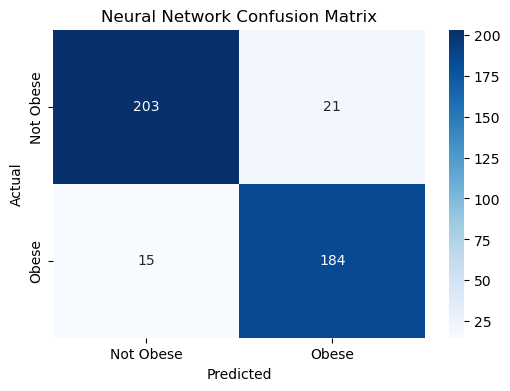

Neural Network Accuracy: 0.9148936170212766
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END .max_depth=20, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=20, min_samples_split=5, n_estimat

In [488]:
from sklearn.neural_network import MLPClassifier

# Initialize model
nn_model = MLPClassifier(random_state=42, max_iter=1000)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Neural Network Accuracy: {accuracy_nn}")

After evaluating several machine learning models, including Logistic Regression, Decision Trees, and Neural Networks, the Random Forest model emerged as the best performer for predicting obesity in this dataset. Random Forests, an ensemble learning method based on constructing multiple decision trees, offer several advantages, including higher accuracy, robustness to overfitting, and the ability to handle both numerical and categorical features effectively. Additionally, by applying Grid Search for hyperparameter tuning, we were able to optimize the model's performance further. Grid Search allowed us to explore a wide range of hyperparameters, such as the number of trees, maximum depth, and minimum samples for splitting, ensuring the best possible configuration for our data. The result was a model with superior accuracy and a well-balanced confusion matrix, making Random Forests the optimal choice for this classification task.

### The best performing model was the Random Forest, with a predictive accuracy of 95.3%. Using Grid Search, we found that the best parameters are 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100.

In conclusion, the insights gained from this analysis and the predictive power of the Random Forest model have the potential to make a significant impact in addressing the global obesity crisis. By accurately identifying individuals at risk for obesity based on factors such as age, gender, physical activity, and dietary habits, we can tailor interventions and public health strategies more effectively. Early detection of obesity risk can lead to targeted health campaigns, personalized lifestyle changes, and improved healthcare outcomes, ultimately reducing the prevalence of obesity-related diseases like heart disease, diabetes, and certain cancers. Furthermore, by understanding the underlying patterns contributing to obesity, policymakers can design more effective policies to promote healthier environments, improve nutrition, and encourage physical activity across different communities. Ultimately, leveraging data and predictive models in this way could play a key role in creating a healthier, more informed world.

# Works Cited

Dataset: https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels/data

https://www.cdc.gov/obesity/adult/causes.html

https://www.cdc.gov/physicalactivity/basics/adults/index.htm

https://www.hsph.harvard.edu/nutritionsource/what-is-obesity/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3151557/

https://ourworldindata.org/obesity